# AnyoneAI - Project I

# An analysis of NBA players in the 2021/2022 season

Hi! this is the first of several projects we're going to be working on during this course. 
You will be expected to finish this on your own, but you can use the available channels on Discord to ask questions and help others. Please read the entire notebook before starting, this will give you a better idea of what you need to accomplish.

This project will rely heavily in the use of API as data sources. Contrary to most machine learning challenges and competitions, working in the industry usually requires the ML Developer to work with multiple teams and use heterogeneous sources of information to get the necessary data to solve a particular problem. Access to data is often provided through application programming interfaces (APIs), whether internal or external to the organization. It is very important to understand how to interact with APIs to collect data in our day to day work.

You might be wondering: why basketball? The main reason is availability of data.

The sport is played at a fast pace, with hundreds of plays in each single game, thousands of games in a season, and with a relatively small amount of on-court players, which gives them a lot of interactions with the ball, which in turn provides an oportunity to collect a great amount of data about each player performance.

These are the objectives of the project:
- Understanding how to query an API to create a dataset with Python and Pandas
- Learning how to cleanup a dataset and generate new fields from calculated data
- Storing the created dataset in a serialized manner
- Generating statistics about the data
- Visualizing data

## Introduction

### A brief description of basketball and the NBA

The National Basketball Association is the main basketball league in the United States of America. It currently features 30 teams from different cities, divided in 2 conferences (East and West) of 15 teams. Each team plays a total of 82 games during the regular season. After that, the 8 teams with better records from each conference are seeded in a playoff format, with the winner of each conference playing the finals to determine the eventual champion. NBA seasons usually play out between october of one year, to june of the next year, so for example the current season being played is called the 2021/2022 season.

As in most leagues in the world, the game is played 5 vs 5 players, with as many as 9 reserve players that can rotate with the starters as many times as the team wants. Games are played to 48 minutes, so the total amount of minutes of combined play time for any team in a single game with no added time is 240 minutes. If the score is tied at the end of the 48 minutes, 5 minutes of extra time are played, this continues until a winner is decided.

Even though they can play multiple positions, players are usually classified according to the following positions:

- Guards
    - Point Guards
    - Shooting Guards
- Forwards
    - Small Forwards
    - Power Forwards
- Centers

We will mainly focus on the three main positions: Guards/Forwards/Centers

### The dataset

You'll be in charge of creating our dataset. We want to create a single pandas dataframe with information about all active players in the current NBA season. 
The dataset needs to have the following structure:

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)
    - next_game_date (datetime)

Here is a sample of how the final result should look like:

In [ ]:
import pandas as pd

sample_dict = {
    'PLAYER_NAME': {200765: 'Rajon Rondo',  203107: 'Tomas Satoransky',  204060: 'Joe Ingles'},
    'TEAM_NAME': {200765: 'Cavaliers', 203107: 'Wizards', 204060: 'Trail Blazers'},
    'POSITION': {200765: 'Guard', 203107: 'Guard', 204060: 'Forward'},
    'HEIGHT': {200765: 185, 203107: 201, 204060: 203},
    'WEIGHT': {200765: 82, 203107: 95, 204060: 100},
    'COUNTRY': {200765: 'USA', 203107: 'Czech Republic', 204060: 'Australia'},
    'BIRTHDATE': {200765: pd.Timestamp('1986-02-22 00:00:00'), 203107: pd.Timestamp('1991-10-30 00:00:00'), 204060: pd.Timestamp('1987-10-02 00:00:00')},
    'SEASON_EXP': {200765: 15, 203107: 5, 204060: 7},
    'DRAFT_NUMBER': {200765: '21', 203107: '32', 204060: 'Undrafted'},
    'GP': {200765: 957, 203107: 388, 204060: 590},
    'MIN': {200765: 29.9, 203107: 22.2, 204060: 25.7},
    'PTS': {200765: 9.8, 203107: 6.9, 204060: 8.6},
    'REB': {200765: 4.5, 203107: 2.9, 204060: 3.2},
    'AST': {200765: 7.9, 203107: 4.1, 204060: 3.8},
    'STL': {200765: 1.6, 203107: 0.8, 204060: 0.9},
    'BLK': {200765: 0.1, 203107: 0.2, 204060: 0.2},
    'GAME_DATE': {200765: pd.Timestamp('2022-04-10 00:00:00'), 203107: pd.Timestamp('2022-04-10 00:00:00'), 204060: pd.Timestamp('2022-04-10 00:00:00')},
    'SALARY': {200765: 2641691, 203107: 10468119, 204060: 14000000},
    'AGE': {200765: '36 years, 1 months, 19 days', 203107: '30 years, 5 months, 11 days', 204060: '34 years, 6 months, 8 days'}
}
pd.DataFrame(sample_dict)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
200765,Rajon Rondo,Cavaliers,Guard,185,82,USA,1986-02-22,15,21,957,29.9,9.8,4.5,7.9,1.6,0.1,2022-04-10,2641691,"36 years, 1 months, 19 days"
203107,Tomas Satoransky,Wizards,Guard,201,95,Czech Republic,1991-10-30,5,32,388,22.2,6.9,2.9,4.1,0.8,0.2,2022-04-10,10468119,"30 years, 5 months, 11 days"
204060,Joe Ingles,Trail Blazers,Forward,203,100,Australia,1987-10-02,7,Undrafted,590,25.7,8.6,3.2,3.8,0.9,0.2,2022-04-10,14000000,"34 years, 6 months, 8 days"


## Collecting information for building our dataset

In this section, we're only going to work on collecting the necessary raw data to build the required dataset. Don't worry about finishing everything here, we'll generate the appropiate fields and merge the data into a single dataframe in the next section.

To get the information, you can use any public and free API you can find, but you have to provide the code that gets the information here. We recommend using this API:
 
- https://github.com/swar/nba_api

    This is a Python library that can be used to obtain data from stats.nba.com, it provides a set of methods that abstracts you from making the http calls, but directly makes calls to nba stats page and parses the results. [Here](https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb) are a couple of examples on how to use it.
    

A few notes on data collection:

- Start simple. Try to get all the required information for 1 player, read the APIs documentation carefuly, then think about how to use them to collect all players data. 

- Please bear in mind that the most public APIs have some kind of rate limit, so you have to be careful about iterating on data and making lots of requests in a short amount of time (a 1 second delay between calls to the api should be enough). Once you've collected what you needed, save it to file in order to retrieve it later without calling the API again.

- A key consideration: we only want data about players that have played in the current season, so make sure to filter those out before collecting the rest of the information.

- There is at least one piece of information you're not going to find in both of those APIs: the player contract information. Again you can decide to use any source, but we recommend using information provided [here](https://www.basketball-reference.com/contracts/players.html), as it lets you export the data as a csv.  

1- Create a function to find all ACTIVE players, meaning players that are listed with a team in the 2021/2022 season. For now you only need the player id, name, and team. Save the dataframe to a csv named "nba_current_players_list.csv". The function should return the dataframe.

Hint: you should find an API method that can give you a list of players in just one call, this way we can filter those players we're interested in, and later will make calls for each specific player.

Consider dropping: 
- All players with TEAM_ID == 0
- All players with GAMES_PLAYED_FLAG == N
- Player with id 1630597 (This guy is a problem ;))

In [ ]:
### Installing all the packages needed for this project
!pip install nba_api
!pip install Unidecode
!pip install matplotlib
!pip install seaborn

     |████████████████████████████████| 125 kB 21.8 MB/s 
  Created wheel for nba-api: filename=nba_api-1.1.11-py3-none-any.whl size=251504 sha256=092b219502fdbfeba0c6541fa2b0aa9b0d76b9fb60de0416d115a81673e8d77c
  Stored in directory: /root/.cache/pip/wheels/e3/f4/46/996128675381abc175e306642bae575d372dcf7efc4683e551
Successfully built nba-api
     |████████████████████████████████| 235 kB 5.7 MB/s 


In [ ]:
### Importing all the libraries needed for this project
import nba_api
import pandas as pd
import numpy as np
import time
import requests
from os.path import exists
import csv
from datetime import datetime
from datetime import date
import datetime
import calendar
from unidecode import unidecode
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
### Complete in this cell: get all active players from the api

def get_and_save_players_list():

    from nba_api.stats.endpoints import commonallplayers

    all_players = commonallplayers.CommonAllPlayers(is_only_current_season=1,
                     league_id="00",
                     season="2021-22")
    df_all_players = all_players.common_all_players.get_data_frame()

    mask_drop = (df_all_players["TEAM_ID"] != 0) & (df_all_players["GAMES_PLAYED_FLAG"] != "N") & (df_all_players["PERSON_ID"] != 1630597)  
    df_all_players_current = df_all_players[mask_drop]
    
    df_players_current_season = df_all_players_current.filter(["PERSON_ID","DISPLAY_FIRST_LAST","TEAM_NAME"]).rename(columns={"DISPLAY_FIRST_LAST": "PLAYER_NAME"})
    
    return df_players_current_season

In [ ]:
current_players_list = get_and_save_players_list()
current_players_list.to_csv("nba_current_players_list.csv")

2- Create a function to find the personal information of all players listed in the dataframe created in the previous step, and save it to a csv file named "nba_players_personal_info.csv". The function should also return the created dataframe.

OPTIONAL: iterating on a list of players and making API calls can be complex and full of errors, try a code block that handles exceptions (for example a timeout from the API) and returns the partial result before it failed, you could also save the partial information to disk.

In [ ]:
### Complete in this cell: Find players personal information (name, age, dob, etc), store the information in a CSV file.

def get_players_personal_information(current_players_list):

    list_ids = current_players_list["PERSON_ID"].tolist()
    new_df = pd.DataFrame(columns = ["PERSON_ID","POSITION","HEIGHT","WEIGHT","COUNTRY","BIRTHDATE","SEASON_EXP","DRAFT_NUMBER"])

    from nba_api.stats.endpoints import commonplayerinfo

    for each_id in list_ids:

        df_t1 = commonplayerinfo.CommonPlayerInfo(player_id=each_id)
        df_t2 = df_t1.common_player_info.get_data_frame()
        df_t3 = df_t2.filter(["PERSON_ID","POSITION","HEIGHT","WEIGHT","COUNTRY","BIRTHDATE","SEASON_EXP","DRAFT_NUMBER"])
        new_df = pd.concat([new_df, df_t3])
        time.sleep(0.6)

    df_final = pd.merge(current_players_list, new_df, on="PERSON_ID")

    return df_final

In [ ]:
players_personal_info = get_players_personal_information(current_players_list)
players_personal_info.to_csv("nba_players_personal_info.csv")

3- Create a function to find players career statistics, store the information in a CSV file called "nba_players_career_stats.csv"

In [ ]:
### Complete in this cell: find players career stats, save to csv file

def get_players_career_stats(current_players_list):

    list_ids = current_players_list["PERSON_ID"].tolist()
    new_df = pd.DataFrame(columns = ["PLAYER_ID","GP","MIN","PTS","REB","AST","STL","BLK"])
    
    from nba_api.stats.endpoints import playercareerstats

    for each_id in list_ids:
    
        df_t1 = playercareerstats.PlayerCareerStats(player_id=each_id)
        df_t2 = df_t1.career_totals_regular_season.get_data_frame()
        df_t3 = df_t2.filter(["PLAYER_ID","GP","MIN","PTS","REB","AST","STL","BLK"])
        new_df = pd.concat([new_df, df_t3])
        time.sleep(0.6)
    
    df_final = new_df.rename(columns={"PLAYER_ID":"PERSON_ID"})
    
    return df_final

In [ ]:
players_career_stats = get_players_career_stats(current_players_list)
players_career_stats.to_csv("nba_players_career_stats.csv")

4- Create a function to find players next games and save the information to a csv call "nba_players_next_game.csv"

In [ ]:
### Complete in this cell: find players next game

def get_players_next_game(current_players_list):

    list_ids = current_players_list["PERSON_ID"].tolist()
    new_df = pd.DataFrame(columns = ["PLAYER_ID","GAME_DATE"])
    new_row = []

    from nba_api.stats.endpoints import playerprofilev2

    for each_id in list_ids:

        new_row.append(each_id)

        df_t1 = playerprofilev2.PlayerProfileV2(player_id=each_id)
        df_tB = df_t1.next_game.get_data_frame()
        if df_tB.empty:
            value_next_game = None
        else:
            value_next_game = df_tB.iloc[0,1]
        new_row.append(value_next_game)

        new_df.loc[len(new_df)] = new_row
        
        new_row = []

        time.sleep(0.6)

    new_df = new_df.astype({"PLAYER_ID":"int64"})
    df_final = new_df.rename(columns={"PLAYER_ID":"PERSON_ID"})
    
    return df_final

In [ ]:
players_next_game = get_players_next_game(current_players_list)
players_next_game.to_csv("nba_players_next_game.csv")

5- Create a function to find players salary for this season, save the information to a csv called "nba_players_salary.csv". Make sure the players names format match the ones in the API, otherwise you won't be able to merge the data later.

Hint: Using data from the Basketball Reference page, you will have to solve 2 kinds of problems, duplicated values (for which you should keep just the first value) and players names not matching with the ones from the API. The latter problem has multiple causes, one of them is that some names are written with non ascii characters (there are libraries for dealing with that).

In [ ]:
### It is important to run this code, in order to have the salaries into our memory, and get the motto of this part

### It should be noted that the import of this file was carried out on April 19, season 2021-22, so if there is any subsequent variation, 
### it is recommended to update the file from the indicated web page or call your ML or AI developer

### STRONGLY RECOMMENDED to update the file if there is a change of season (the next one is 2022-23)

def import_data_files():
  r = requests.get('https://raw.githubusercontent.com/LuchoPenaloza/Anyone_sprints/main/contracts_nba.csv')
  with open('contracts.csv', 'wb') as f:
    f.write(r.content)

import_data_files()
print("Contracts CSV file has been added to the memory")
print("The information was downloaded from https://www.basketball-reference.com/contracts/players.html")

Contracts CSV file has been added to the memory
The information was downloaded from https://www.basketball-reference.com/contracts/players.html


In [ ]:
### Complete in this cell: find players salary, save the information to csv

def get_nba_players_salaries(csv_file_path):

    with open(csv_file_path, 'r'):

        pd_file = pd.read_csv(csv_file_path)

    pd_file = pd_file.drop(labels=0, axis=0)
    pd_file = pd_file.iloc[:, [1, 3]]
    pd_file = pd_file.reset_index(drop=True)

    pd_file.columns.values[0] = "PLAYER_NAME1"
    pd_file.columns.values[1] = "SALARY"

    df_prev_1 = pd_file.drop_duplicates(subset="PLAYER_NAME1", keep="first")

    df_prev_2 = df_prev_1.copy()
    df_prev_2["PLAYER_NAME"] = df_prev_1["PLAYER_NAME1"].apply(lambda x: x.split("\\",1)[0])
    df_prev_2.insert(0, "PLAYER_NAME", df_prev_2.pop("PLAYER_NAME"))
    df_final = df_prev_2.drop(["PLAYER_NAME1"], axis = 1)
    df_final["PLAYER_NAME"] = df_final["PLAYER_NAME"].apply(lambda x: unidecode(x))
    
    df_final["PLAYER_NAME"] = df_final["PLAYER_NAME"].replace(["Kevin Knox"],"Kevin Knox II")
    df_final["PLAYER_NAME"] = df_final["PLAYER_NAME"].replace(["Marcus Morris"],"Marcus Morris Sr.")
    df_final["PLAYER_NAME"] = df_final["PLAYER_NAME"].replace(["Robert Williams"],"Robert Williams III")
    df_final["PLAYER_NAME"] = df_final["PLAYER_NAME"].replace(["Xavier Tillman Sr."],"Xavier Tillman")
    
    merged_prefinal = pd.merge(current_players_list, df_final, on ="PLAYER_NAME", how ="left")
    merged_final_salary = merged_prefinal.filter(["PERSON_ID","SALARY"])
    
    return merged_final_salary

In [ ]:
players_salaries = get_nba_players_salaries("contracts.csv")
players_salaries.to_csv("nba_players_salary.csv")

6- Create a function to merge the created dataframes: players_personal_info, players_career_stats, players_next_game, players_salaries. For each dataframe, select only the subset of columns needed to create the dataset described in section "The Dataset"

    - Players info: "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"
    - Players stats: "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"
    - Misc: "GAME_DATE", "SALARY"

Save the result to a csv called "raw_nba_players_dataset.csv"

Hint: Before merging the data, you should make sure all four dataframes have the same length, are indexed by PERSON_ID and have the same keys

In [ ]:
# Complete in this cell: merge the dataframes

def merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries):
    
    merged_1 = pd.merge(players_personal_info, players_career_stats, on ="PERSON_ID", how ="left")
    merged_2 = pd.merge(players_next_game, players_salaries, on ="PERSON_ID", how ="left")
    merged_final = pd.merge(merged_1, merged_2, on ="PERSON_ID", how ="left")
    
    merged_final = merged_final.astype({"PERSON_ID":"int"})
    merged_final = merged_final.set_index("PERSON_ID")
    
    return merged_final

In [ ]:
raw_players_dataset = merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries)
raw_players_dataset.to_csv("raw_nba_players_dataset.csv")

## Data Cleaning and Preprocessing

There are several steps that you will have to follow, depending on where you have collected the data some information might be missing.  

- Height and weight might need to be converted to the metric system
- Players that have no team assigned should be removed from the dataset
- Players with no contracts (meaning they don't have a salary defined) should be removed from the dataset
- If the "position" data is ambiguous (listed at multiple positions), use the first value
- If the player does not have height or weight data, use the average for its position as its value
- In order to fill the column next_game_date, just consider the date of the next game of each player's team. 

1- Create a copy of your dataset named "working_df", remove all players with no teams or salary

In [ ]:
### Complete in this cell: copy the dataset and drop NaNs in team or salary

def copy_and_delete_nan(players_dataset):
    players_dataset = players_dataset[players_dataset.TEAM_NAME.notnull()]
    players_dataset = players_dataset[players_dataset.SALARY.notnull()]
    return players_dataset

In [ ]:
working_df = copy_and_delete_nan(raw_players_dataset)

2- Cast Salary, Birthday and Game Date columns to its corresponding type (int, datetime) 

In [ ]:
### Complete in this cell: cast all columns to its type

def cast_columns(working_df):
    working_df["SALARY"] = working_df["SALARY"].str.replace("$", "", regex=True).astype(int)
    working_df["BIRTHDATE"] = working_df["BIRTHDATE"].apply(lambda x: x.split("T",1)[0])
    working_df["BIRTHDATE"] = pd.to_datetime(working_df["BIRTHDATE"], format="%Y-%m-%d")
    working_df["GAME_DATE"] = pd.to_datetime(working_df["GAME_DATE"], format="%b %d %Y")

In [ ]:
cast_columns(working_df)

3- Create a function that converts the height column from height in feet and inches to centimeters

In [ ]:
### Complete in this cell: convert height column

def convert_height_column(working_df):
    df_feet = pd.DataFrame(columns = ["H_FEET","H_INCHES"])

    df_feet["H_FEET"] = working_df["HEIGHT"].apply(lambda x: x.split("-",1)[0]).astype(float)
    df_feet["H_INCHES"] = working_df["HEIGHT"].apply(lambda x: x.split("-",1)[1]).astype(float)
    working_df["HEIGHT"] = (df_feet["H_FEET"]*30.48 + df_feet["H_INCHES"]*2.54).round(0).astype(int)

In [ ]:
convert_height_column(working_df)

4- Create a function that converts the weight column from pounds to kilograms

In [ ]:
### Complete in this cell: convert weight column

def convert_weight_column(working_df):
    working_df["WEIGHT"] = ((working_df["WEIGHT"].astype(float))*0.453592).round(1)

In [ ]:
convert_weight_column(working_df)

5- Create a function that calculates the age in (years, months, days) and saves it in a new string column, example: "22 years, 5 months, 25 days" 

In [ ]:
### Complete in this cell: add age column

def add_age_column(working_df):
    df_copy_1 = working_df.copy()
    today = pd.to_datetime("today")

    df_copy_1["PREV_AGE"] = today - df_copy_1["BIRTHDATE"]
    df_copy_1["ONLY_AGE"] = df_copy_1["PREV_AGE"]/np.timedelta64(1,'Y')
    df_copy_1["AGE_GOOD"] = df_copy_1["ONLY_AGE"].astype(int)
    df_copy_1["MONTH_PREV_1"] = df_copy_1["ONLY_AGE"] - df_copy_1["AGE_GOOD"]
    df_copy_1["MONTH_PREV_2"] = df_copy_1["MONTH_PREV_1"]*12
    df_copy_1["MONTH_GOOD"] = df_copy_1["MONTH_PREV_2"].astype(int)
    df_copy_1["DAYS_PREV_1"] = df_copy_1["MONTH_PREV_2"] - df_copy_1["MONTH_GOOD"]
    df_copy_1["DAYS_PREV_2"] = df_copy_1["DAYS_PREV_1"]*calendar.monthrange(today.year, today.month)[1]
    df_copy_1["DAYS_GOOD"] = df_copy_1["DAYS_PREV_2"].astype(int)+1
    working_df["AGE"] = df_copy_1["AGE_GOOD"].astype(str) + " years, " + df_copy_1["MONTH_GOOD"].astype(str) + " months, " + df_copy_1["DAYS_GOOD"].astype(str) + " days"

In [ ]:
add_age_column(working_df)

6- Create a function that takes care of the disambiguation of the "POSITION" column. Should replace all positions that are mixed with the first one listed.

In [ ]:
### Complete in this cell: disambiguation of the position column

def update_position(working_df):
    #working_df.POSITION.unique()
    
    working_df["POSITION"] = working_df["POSITION"].str.replace("Center-Forward", "Center")
    working_df["POSITION"] = working_df["POSITION"].str.replace("Forward-Center", "Forward")
    working_df["POSITION"] = working_df["POSITION"].str.replace("Forward-Guard", "Forward")
    working_df["POSITION"] = working_df["POSITION"].str.replace("Guard-Forward", "Guard")

In [ ]:
update_position(working_df)

In [ ]:
### We will finalice the data processing making some columns with their corresponding datatypes
### It is important to mention that we will not assign the datatype "int" to the DRAFT_NUMBER column because we do not want to lose the "Undrafted" info of some players

working_df["SEASON_EXP"] = working_df["SEASON_EXP"].astype("int")
working_df["GP"] = working_df["GP"].astype("Int64")
working_df["MIN"] = pd.to_numeric(working_df["MIN"], downcast="float", errors="coerce")
working_df["PTS"] = pd.to_numeric(working_df["PTS"], downcast="float", errors="coerce")
working_df["REB"] = pd.to_numeric(working_df["REB"], downcast="float", errors="coerce")
working_df["AST"] = pd.to_numeric(working_df["AST"], downcast="float", errors="coerce")
working_df["STL"] = pd.to_numeric(working_df["STL"], downcast="float", errors="coerce")
working_df["BLK"] = pd.to_numeric(working_df["BLK"], downcast="float", errors="coerce")

7- Review that the working dataset has all requested columns with its corresponding datatypes and save it as a csv with name "nba_players_processed_dataset.csv"

In [ ]:
working_df.to_csv("nba_players_processed_dataset.csv")

## Analyzing and Visualizing data

Now that we have the data, let's do some work

1- Calculate and print the following metrics:

    - General metrics:
        - Total number of players
        - Number of USA born players
        - Number of foreign players
        - Number of players per position
        - Number of players per team
        - Number of rookies (first year players)
    - Players description
        - Average player age (in years)
        - Youngest player age (years and days, i.e: 18 years and 16 days)
        - Oldest player age (years and days, i.e: 40 years and 160 days)
        - Min and Max players height
        - Average height of players per position
    - Contracts
        - Min and Max salary of all players
        - Mean and Median salary of all players

Bonus: if you can, calculate how many players retired between the end of the 2020-2021 season and the start of the 2021-22 season.

In [ ]:
### Complete in this cell: print general metrics

print("GENERAL METRICS:")
print()
print("- The total number of players are:",len(working_df))
mask_usa_players = (working_df["COUNTRY"] == "USA")
print("- The number of USA born players are:",len(working_df[mask_usa_players]))
print("- The number of foreign players are:",len(working_df) - len(working_df[mask_usa_players]))
print()
for i in range(len(working_df["POSITION"].value_counts())):
    print("- The number of players in the",working_df["POSITION"].value_counts().index[i],"position are:",working_df["POSITION"].value_counts().iloc[i])
print()
for i in range(len(working_df["TEAM_NAME"].value_counts())):
    print("- The number of players in the team",working_df["TEAM_NAME"].value_counts().index[i],"are:",working_df["TEAM_NAME"].value_counts().iloc[i])
print()
mask_rookies = (working_df["SEASON_EXP"] == 0)
print("- The number of rookies (first year players) are:",len(working_df[mask_rookies]))

GENERAL METRICS:

- The total number of players are: 451
- The number of USA born players are: 342
- The number of foreign players are: 109

- The number of players in the Guard position are: 213
- The number of players in the Forward position are: 178
- The number of players in the Center position are: 60

- The number of players in the team Grizzlies are: 16
- The number of players in the team Cavaliers are: 16
- The number of players in the team Pelicans are: 16
- The number of players in the team Spurs are: 16
- The number of players in the team Raptors are: 15
- The number of players in the team Hawks are: 15
- The number of players in the team Trail Blazers are: 15
- The number of players in the team Warriors are: 15
- The number of players in the team Pacers are: 15
- The number of players in the team Mavericks are: 15
- The number of players in the team Timberwolves are: 15
- The number of players in the team Thunder are: 15
- The number of players in the team 76ers are: 15
- T

In [ ]:
### Complete in this cell: print players descriptions

today = pd.to_datetime("today")

def number_days_current_year():    
    days_of_year = 0
    today = pd.to_datetime("today")
    if today.is_leap_year:
        days_of_year = 366
    else:
        days_of_year = 365
    return days_of_year

df_copy_2 = working_df.copy()
df_copy_2["PREV_AGE"] = today - df_copy_2["BIRTHDATE"]
df_copy_2["ONLY_AGE"] = df_copy_2["PREV_AGE"]/np.timedelta64(1,'Y')
df_copy_2["AGE_GOOD"] = df_copy_2["ONLY_AGE"].astype(int)
df_copy_2["DAYS_REST"] = df_copy_2["ONLY_AGE"] - df_copy_2["AGE_GOOD"]
df_copy_2["DAYS_PREV"] = df_copy_2["DAYS_REST"]*number_days_current_year()
df_copy_2["DAYS_GOOD"] = df_copy_2["DAYS_PREV"].astype(int)+1
df_copy_2["AGE_DAYS"] = df_copy_2["AGE_GOOD"].astype(str) + " years and " + df_copy_2["DAYS_GOOD"].astype(str) + " days"

age_min = df_copy_2.sort_values(by="PREV_AGE").iloc[0,25]
age_max = df_copy_2.sort_values(by="PREV_AGE").iloc[len(df_copy_2)-1,25]

print("PLAYERS DESCRIPTION:")
print()
print("- The average player age is:","{0:,.2f}".format(df_copy_2["ONLY_AGE"].mean()),"years")
print("- The youngest player age is",age_min)
print("- The oldest player age is",age_max)
print("- The min players height is:","{0:,.1f}".format(df_copy_2["HEIGHT"].min()),"cms")
print("- The max players height is:","{0:,.1f}".format(df_copy_2["HEIGHT"].max()),"cms")

df_copy_3 = df_copy_2.pivot_table(index="POSITION", values="HEIGHT", aggfunc="mean")
df_copy_4 = df_copy_3.reset_index()

for i in range(len(df_copy_4)):
    print("- The average height of players per",df_copy_4.iloc[i,0],"position is:",df_copy_4.iloc[i,1].round(2),"cms")

PLAYERS DESCRIPTION:

- The average player age is: 26.71 years
- The youngest player age is 19 years and 130 days
- The oldest player age is 41 years and 328 days
- The min players height is: 175.0 cms
- The max players height is: 221.0 cms
- The average height of players per Center position is: 210.73 cms
- The average height of players per Forward position is: 203.04 cms
- The average height of players per Guard position is: 192.43 cms


In [ ]:
### Complete in this cell: Contracts

print("CONTRACTS:")
print()
print("- The min salary of all players is:","USD","{0:,.2f}".format(working_df["SALARY"].min()))
print("- The max salary of all players is:","USD","{0:,.2f}".format(working_df["SALARY"].max()))
print("- The mean salary of all players is:","USD","{0:,.2f}".format(working_df["SALARY"].mean()))
print("- The median salary of all players is:","USD","{0:,.2f}".format(working_df["SALARY"].median()))

CONTRACTS:

- The min salary of all players is: USD 5,318.00
- The max salary of all players is: USD 45,780,966.00
- The mean salary of all players is: USD 8,690,772.63
- The median salary of all players is: USD 4,373,160.00


2- Plot the relationship between scoring (points per game) and salary of all players, the players positions should also be visible.

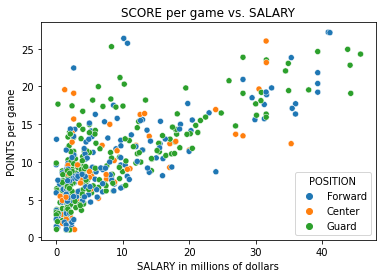

In [ ]:
### Complete in this cell:  Relationship between scoring and salary (in millions of dollars)

working_df_copy = working_df.copy()

working_df_copy["PTS_GAME"] = working_df_copy["PTS"]/working_df_copy["GP"]
working_df_copy["SALARY_MILL"] = working_df_copy["SALARY"]/1000000

sns.scatterplot(data=working_df_copy, x="SALARY_MILL", y="PTS_GAME", hue="POSITION").set(title="SCORE per game vs. SALARY")
plt.xlabel("SALARY in millions of dollars")
plt.ylabel("POINTS per game")
plt.show()

3- Now plot assists-vs-salary and rebounding-vs-salary

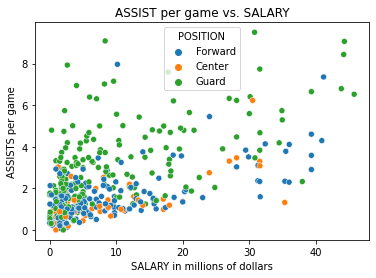

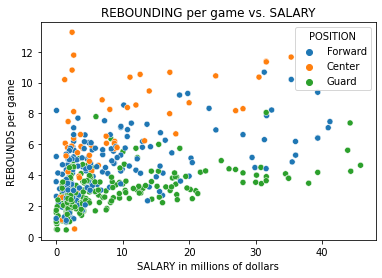

In [ ]:
### Complete in this cell: plot assist-vs-salary, rebounding-vs-salary

working_df_copy["AST_GAME"] = working_df_copy["AST"]/working_df_copy["GP"]
working_df_copy["REB_GAME"] = working_df_copy["REB"]/working_df_copy["GP"]

sns.scatterplot(data=working_df_copy, x="SALARY_MILL", y="AST_GAME", hue="POSITION").set(title="ASSIST per game vs. SALARY")
plt.xlabel("SALARY in millions of dollars")
plt.ylabel("ASSISTS per game")
plt.show()
print()
sns.scatterplot(data=working_df_copy, x="SALARY_MILL", y="REB_GAME", hue="POSITION").set(title="REBOUNDING per game vs. SALARY")
plt.xlabel("SALARY in millions of dollars")
plt.ylabel("REBOUNDS per game")
plt.show()

4- When NBA players enter the league, they have low value salaries during what is called their "rookie contract". This means that it doesn't matter how well the player performs, they can't have large salaries. This can distort our understanding of how much teams value each skill, as a player could score 50 points a game and still earn just a couple of millions. So, lets now plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience (the typical length of a rookie contract)

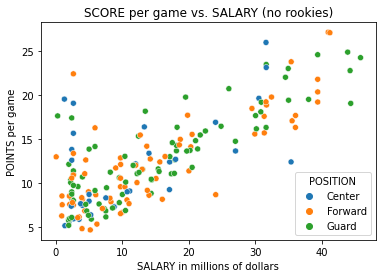

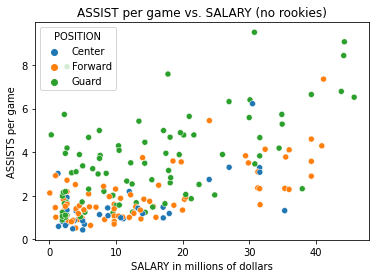

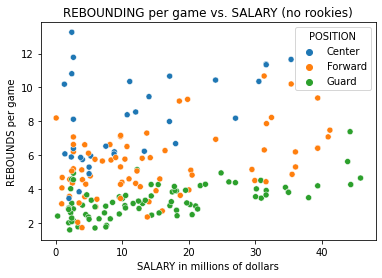

In [ ]:
### Complete in this cell: non rookie contracts

mask_no_rookies = (working_df_copy["SEASON_EXP"] > 4)

sns.scatterplot(data=working_df_copy[mask_no_rookies], x="SALARY_MILL", y="PTS_GAME", hue="POSITION").set(title="SCORE per game vs. SALARY (no rookies)")
plt.xlabel("SALARY in millions of dollars")
plt.ylabel("POINTS per game")
plt.show()
print()
sns.scatterplot(data=working_df_copy[mask_no_rookies], x="SALARY_MILL", y="AST_GAME", hue="POSITION").set(title="ASSIST per game vs. SALARY (no rookies)")
plt.xlabel("SALARY in millions of dollars")
plt.ylabel("ASSISTS per game")
plt.show()
print()
sns.scatterplot(data=working_df_copy[mask_no_rookies], x="SALARY_MILL", y="REB_GAME", hue="POSITION").set(title="REBOUNDING per game vs. SALARY (no rookies)")
plt.xlabel("SALARY in millions of dollars")
plt.ylabel("REBOUNDS per game")
plt.show()

5- Plot the scoring average grouped by position, we want to be able to see median, quartiles, etc 

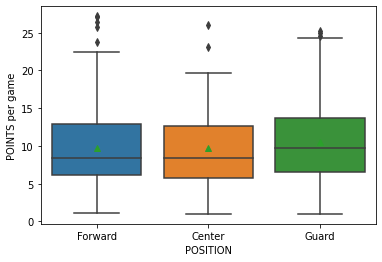

In [ ]:
### Complete in this cell: Scoring average grouped by position

sns.boxplot(data=working_df_copy, y="PTS_GAME", x="POSITION", showmeans=True)
plt.ylabel("POINTS per game")
plt.show()

6- Plot the Height distribution of all players

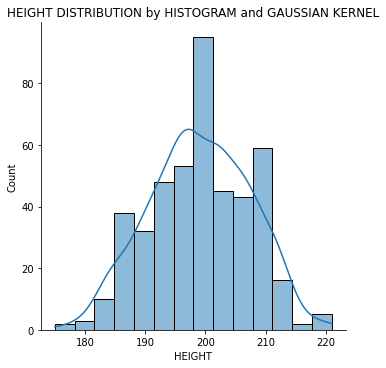

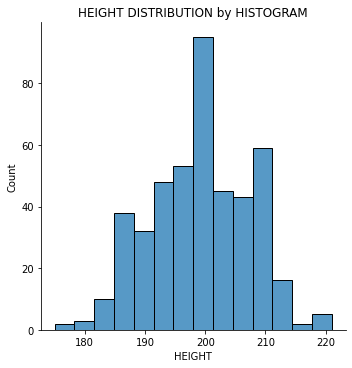

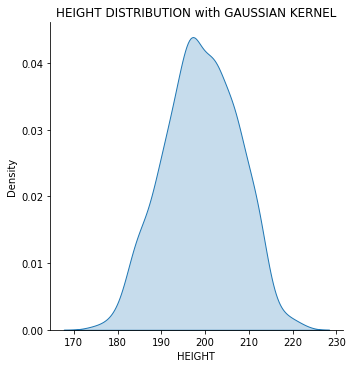

In [ ]:
### Complete in this cell: height distribution

sns.displot(data=working_df, x="HEIGHT", kde=True).set(title="HEIGHT DISTRIBUTION by HISTOGRAM and GAUSSIAN KERNEL")
plt.show()
print()
sns.displot(data=working_df, x="HEIGHT", kind="hist").set(title="HEIGHT DISTRIBUTION by HISTOGRAM")
plt.show()
print()
sns.displot(data=working_df, x="HEIGHT", kind="kde", fill=True).set(title="HEIGHT DISTRIBUTION with GAUSSIAN KERNEL")
plt.show()